# Heart CSV Data Mining

In [16]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import recall_score, RocCurveDisplay, make_scorer, precision_score, precision_recall_curve, PrecisionRecallDisplay, ConfusionMatrixDisplay, roc_auc_score, roc_curve, f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')
heart = pd.read_csv('heart.csv')
import missingno as mnso

In [22]:
print(heart.size)
print(heart.shape)
heart

11016
(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [12]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [13]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [14]:
heart.isnull().mean()*100

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

<Axes: >

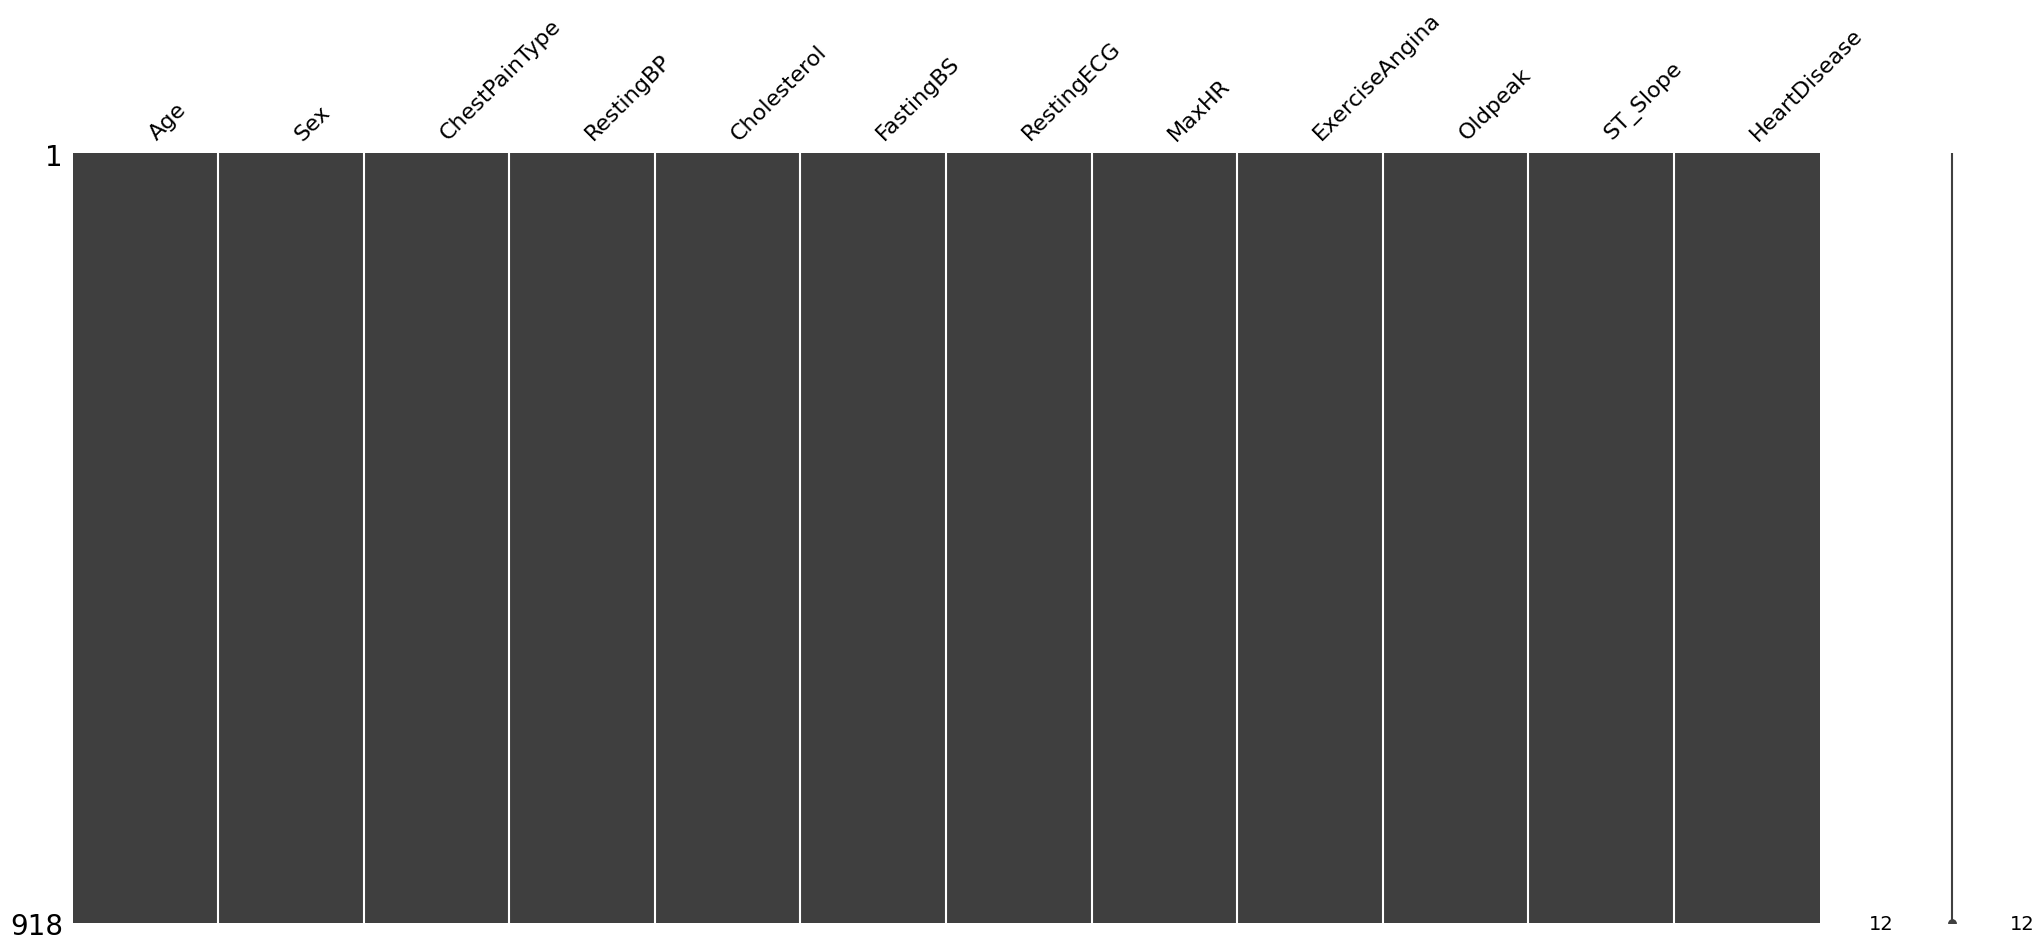

In [17]:
mnso.matrix(heart)


In [21]:
women = heart.loc[heart['Sex']=='F']['HeartDisease']
rate_women = (women.sum()/len(women)).round(2)*100
print(f"probablity of women with heart disease are : {rate_women}")

men = heart.loc[heart['Sex']=='M']['HeartDisease']
rate_men = (men.sum()/len(men)).round(2)*100
print(f"probablity of men with heart disease are : {rate_men}")

probablity of women with heart disease are : 26.0
probablity of men with heart disease are : 63.0


In [30]:
# Correlation
heart.agg({
    "Age" : ['min', 'max', 'mean', 'median', 'skew', 'std'],
    "RestingBP" : ['min', 'max', 'mean', 'median', 'skew', 'std'],
    "Cholesterol" : ['min', 'max', 'mean', 'median', 'skew', 'std'],
    "Oldpeak" : ['min', 'max', 'mean', 'median', 'skew', 'std'],
    "MaxHR" : ['min', 'max', 'mean', 'median', 'skew', 'std'],
})

,Age,RestingBP,Cholesterol,Oldpeak,MaxHR
min,28.000000,0.000000,0.000000,-2.600000,60.000000
max,77.000000,200.000000,603.000000,6.200000,202.000000
mean,53.510893,132.396514,198.799564,0.887364,136.809368
median,54.000000,130.000000,223.000000,0.600000,138.000000
skew,-0.195933,0.179839,-0.610086,1.022872,-0.144359
std,9.432617,18.514154,109.384145,1.066570,25.460334


<Axes: xlabel='Cholesterol', ylabel='Density'>

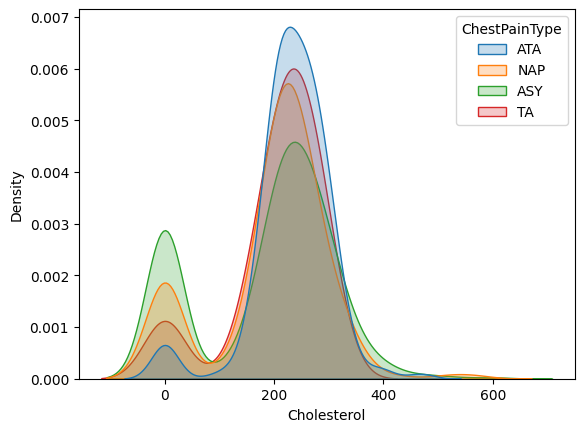

In [29]:
sns.kdeplot(data=heart, x="Cholesterol", hue='ChestPainType', fill=True, common_norm=False, palette='tab10')

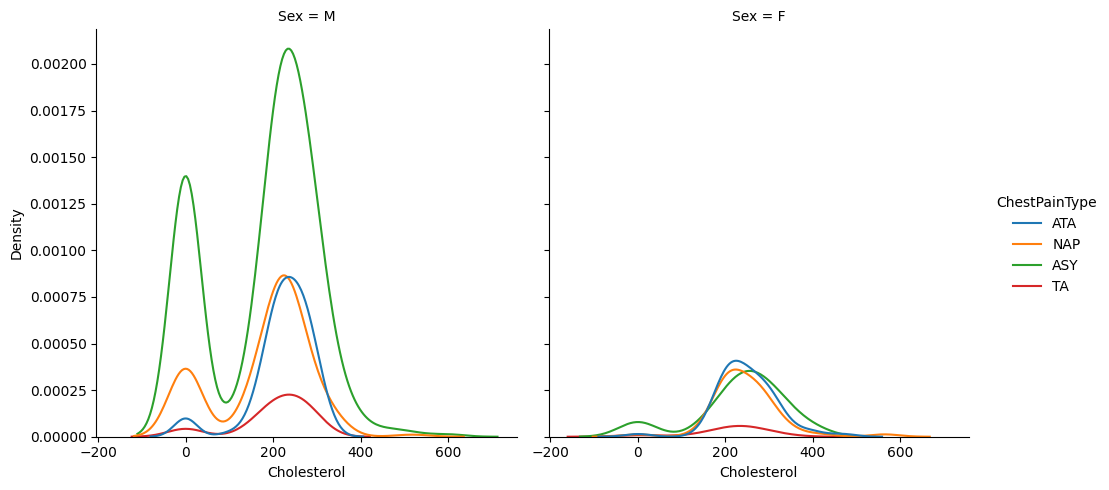

In [32]:
sns.displot(data=heart, x='Cholesterol', hue='ChestPainType', col='Sex', kind='kde')